In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def reward_rules(position, action, terminal, states):
    if position in terminal:
        return position, 0
    new_position = np.array(position) + np.array(action)
    n_p = new_position.tolist()
    if n_p not in states:
        return position, 0
    else:
        return new_position, -1

def policy_evaluation(ValueFunction, states, actions, gamma, theta):
    while True:
        v = np.copy(ValueFunction)
        delta = []
        for s in states:
            update = 0
            for a in actions:
                new_position, r = reward_rules(s, a, terminal, states)
                update += (1/len(actions))*(r+(gamma*ValueFunction[new_position[0], new_position[1]]))
            delta.append(np.abs(v[s[0], s[1]] - update))
            v[s[0], s[1]] = update
        ValueFunction = v
        if np.all(delta < theta):
            return ValueFunction

In [3]:
gamma = 1
gridSize = 4
terminal = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]
theta = np.repeat(0.001, 16)
V = np.zeros((gridSize, gridSize))

nV = policy_evaluation(V, states, actions, gamma, theta)
nV

array([[  0.        , -10.98977041, -15.48484159, -16.48303684],
       [-10.98977041, -14.48664634, -15.98494299, -15.48484159],
       [-15.48484159, -15.98494299, -14.48664634, -10.98977041],
       [-16.48303684, -15.48484159, -10.98977041,   0.        ]])

In [4]:
def random_policy(states, actions):
    policy = {} 
    for s in states:
        rand_action = np.random.choice(len(actions))
        policy['{}'.format(s)] = actions[rand_action]
    return policy

In [5]:
def available_actions(state, actions, gridSize):
    a = actions.copy()
    if state[0] == 0:
        a.remove([-1,0])
    if state[0] == gridSize-1:
        a.remove([1,0])
    if state[1] == 0:
        a.remove([0,-1])
    if state[1] == gridSize-1:
        a.remove([0,1])
    return a

In [6]:
def policy_improvement(states, policy, actions, terminal, ValueFunction):
    stable = np.repeat(True, len(states))
    i = 0
    for s in states:
        old_action = policy['{}'.format(s)]
        action_pool = available_actions(s, actions, gridSize)
        if s in terminal:
            max_a = [0,0]
        else:
            max_a = action_pool[0]
        max_pos, max_r = reward_rules(s, max_a, terminal, states)
        max_action = (max_r+(gamma*ValueFunction[max_pos[0], max_pos[1]]))
        
        for a in action_pool:
            new_position, r = reward_rules(s, a, terminal, states)           
            value_action = (r+(gamma*ValueFunction[new_position[0], new_position[1]]))
            if np.all(max_action < value_action):
                max_a = a
        policy['{}'.format(s)] = max_a
        if np.any(old_action != policy['{}'.format(s)]):
            stable[i] = False
        i += 1
    return policy, stable 

In [7]:
def policy_iteration(gridSize, states, actions, gamma, theta, terminal):
    V = np.zeros((gridSize, gridSize))
    policy = random_policy(states, actions)
    stable = np.repeat(False, len(states))
    while True:
        V = policy_evaluation(V, states, actions, gamma, theta)
        p , stable= policy_improvement(states, policy, actions, terminal, V)
        if np.all(stable):
            break
        else: policy = p
    return p, V

In [8]:
p, v = policy_iteration(gridSize, states, actions, gamma, theta, terminal)
v

array([[  0.        , -10.99131763, -15.48713429, -16.48560251],
       [-10.99131763, -14.48866607, -15.98722035, -15.48713429],
       [-15.48713429, -15.98722035, -14.48866607, -10.99131763],
       [-16.48560251, -15.48713429, -10.99131763,   0.        ]])

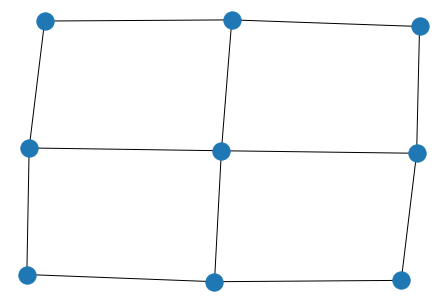

In [9]:
g = nx.Graph()

g.add_nodes_from([
    (0, {'reward': 0}),
    (1, {'reward': 0}),
    (2, {'reward': 0}),
    (3, {'reward': 0}),
    (4, {'reward': 0}),
    (5, {'reward': 0}),
    (6, {'reward': 0}),
    (7, {'reward': 0}),
    (8, {'reward': 0}),
])

g.add_edges_from([
    (0,1, {'value': 0}),
    (1,2, {'value': 0}), 
    (0,3, {'value': 0}), 
    (3,4, {'value': 0}), 
    (1,4, {'value': 0}),
    (4,5, {'value': 0}),
    (2,5, {'value': 0}),
    (3,6, {'value': 0}),
    (6,7, {'value': 0}), 
    (4,7, {'value': 0}), 
    (7,8, {'value': 0}), 
    (5,8, {'value': 0}),
    (0,0, {'value': 0}),
    (8,8, {'value': 0})])

nx.draw(g)
plt.show()


In [10]:
# variables
gamma = 1
gridSize = 3
Gterminal = [0, gridSize*gridSize-1]
theta = np.repeat(0.001, 9)

In [11]:
# functions definition for graphs
def Greward_rules(s, a, terminal):
    if s in terminal:
        return s, 0
    else:
        return a[1], -1

def Gpolicy_evaluation(g, gamma, theta, terminal):
    while True:
        v = g.copy()
        delta = []
        for s in g.nodes:
            update = 0
            for a in g.edges(s):
                new_state, r = Greward_rules(s, a, terminal)
                update += (1/len(g.edges(s)))*(r+(gamma*g.nodes[new_state]['reward']))
            delta.append(np.abs( v.nodes[s]['reward'] - update))
            v.nodes[s]['reward'] = update
        g = v.copy()
        if np.all(delta < theta):
            return g

In [12]:
g = Gpolicy_evaluation(g, gamma, theta, Gterminal)
for i in range(9):
    print(g.nodes[i])

{'reward': 0.0}
{'reward': -4.997293442061604}
{'reward': -5.996616802577005}
{'reward': -4.997293442061604}
{'reward': -5.996616802577005}
{'reward': -4.997293442061603}
{'reward': -5.996616802577005}
{'reward': -4.997293442061603}
{'reward': 0.0}


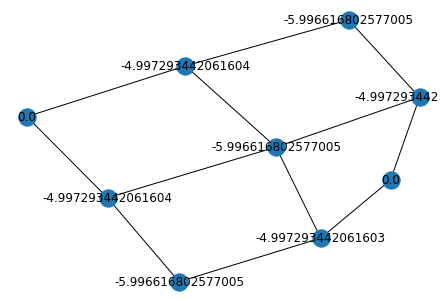

In [13]:
pos = nx.spring_layout(g)
nx.draw(g, pos)
node_labels = nx.get_node_attributes(g,'reward')
nx.draw_networkx_labels(g, pos, labels = node_labels)
plt.show()

Implement policy iteration using graphs and then try to solve the sssp.

In [14]:
def Grandom_policy(g):
    policy = {} 
    for s in g.nodes:
        rand_action = np.random.choice(len(g.edges(s)))
        policy['{}'.format(s)] = list(g.edges(s))[rand_action]
    return policy

In [15]:
def Gpe(g, gamma, theta, terminal):
    while True:
        v = g.copy()
        delta = []
        for s in g.nodes:
            update = 0
            for a in g.edges(s):
                new_state, r = Greward_rules(s, a, terminal)
                update += 1/(len(g.edges(s)))*(r+(gamma*g.nodes[new_state]['reward'])) 
            delta.append(np.abs(v.nodes[s]['reward'] - update))
            v.nodes[s]['reward'] = update
        g = v.copy()
        if np.all(delta < theta):
            return g

def Gpi(g, policy, terminal, stable):
    i = 0
    for s in g.nodes:
        if s in terminal:
            policy["{}".format(s)] = [s, s]
            continue
        max_state, max_r = Greward_rules(s, list(g.edges(s))[0], terminal)
        max_a = list(g.edges(s))[0] 
        max_action = 1/(len(g.edges(0)))*(max_r+(gamma*g.nodes[max_state]['reward'])) 
        old_action = policy['{}'.format(s)]
        for a in g.edges(s):
            new_state, r = Greward_rules(s, a, terminal)
            value_action = 1/(len(g.edges(s)))*(r+(gamma*g.nodes[new_state]['reward']))        
            if np.all(max_action < value_action):
                max_a = a
                max_action = value_action
        policy['{}'.format(s)] = max_a
        if np.any(old_action != policy['{}'.format(s)]):
            stable[i] = False
        i += 1
    return policy, stable

In [16]:
def Gpolicy_iteration(g, Gterminal, gamma, theta):
    p = Grandom_policy(g)
    stable = np.repeat(True, g.size())
    iteration = 0
    while True:
        iteration +=1
        g = Gpe(g, gamma, theta, Gterminal)
        p, stable = Gpi(g, p, Gterminal, stable)
        if np.all(stable) or iteration == 5000:
            return p, g
        

In [17]:
p, g = Gpolicy_iteration(g, Gterminal, gamma, theta)

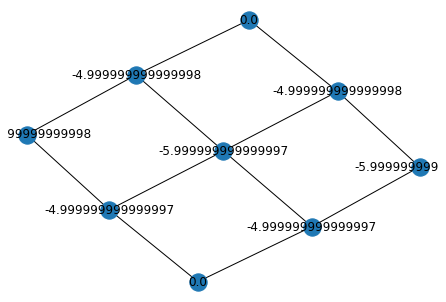

In [18]:
pos = nx.spring_layout(g)
nx.draw(g, pos)
node_labels = nx.get_node_attributes(g,'reward')
nx.draw_networkx_labels(g, pos, labels = node_labels)
plt.show()

In [19]:
p

{'0': [0, 0],
 '1': (1, 0),
 '2': (2, 1),
 '3': (3, 0),
 '4': (4, 5),
 '5': (5, 8),
 '6': (6, 3),
 '7': (7, 8),
 '8': [8, 8]}